### Importing the libraries

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Loading the data

In [2]:
data = pd.read_csv("Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


### Data Analysis

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [5]:
#validate missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Handling Unused values

In [6]:
#drop unused values
data = data.drop(['CustomerID'], axis = 1)

### Show data info and statistics

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### Data Describing

In [8]:
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


### Data Visualisation

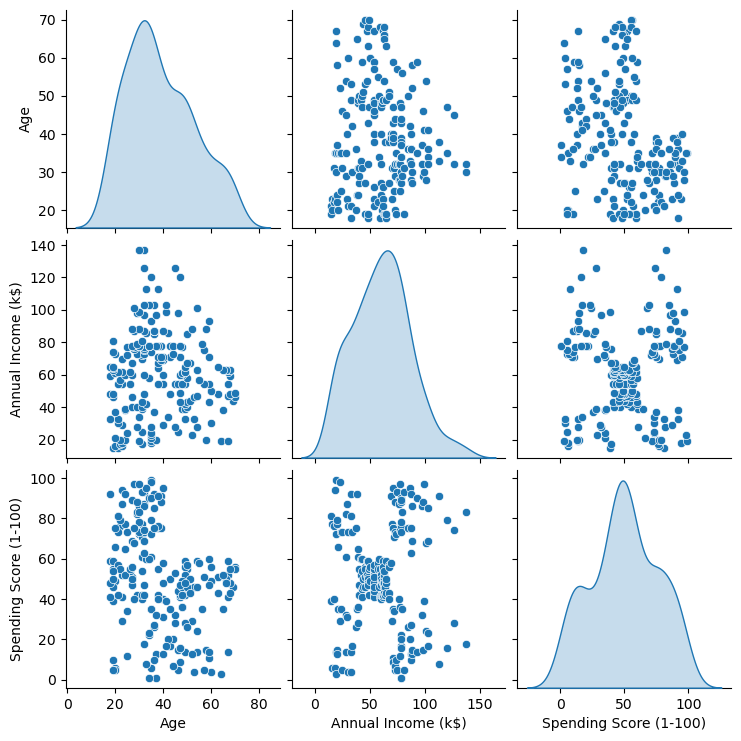

In [9]:
sns.pairplot(data, diag_kind='kde')
plt.show()

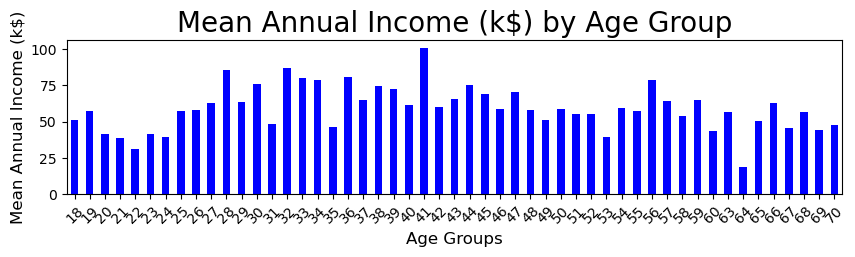

In [10]:
# Calculate mean income by age group
mean_income_by_age = data.groupby('Age')['Annual Income (k$)'].mean()

# Now plot the result
plt.figure(figsize=(10, 2))
mean_income_by_age.plot(kind='bar', color='b')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean Annual Income (k$)', fontsize=12)
plt.title('Mean Annual Income (k$) by Age Group', fontsize=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [11]:
df = pd.read_csv('Mall_Customers.csv')
df_gender = df.groupby (by='Gender')
mean_income_gender = df_gender['Annual Income (k$)'].mean()
mean_income_gender

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [12]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


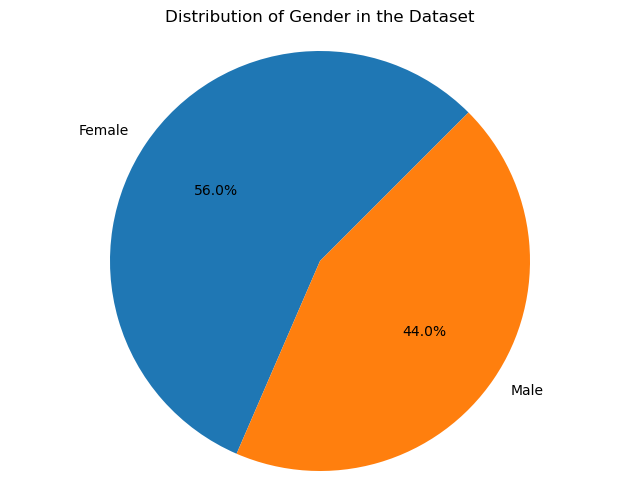

In [13]:
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=45)
plt.title("Distribution of Gender in the Dataset")
plt.axis('equal')
plt.show()

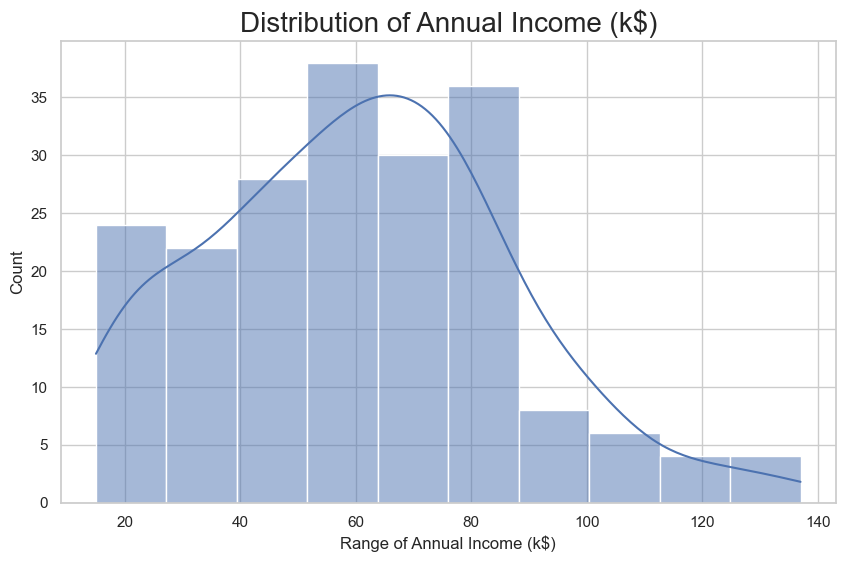

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

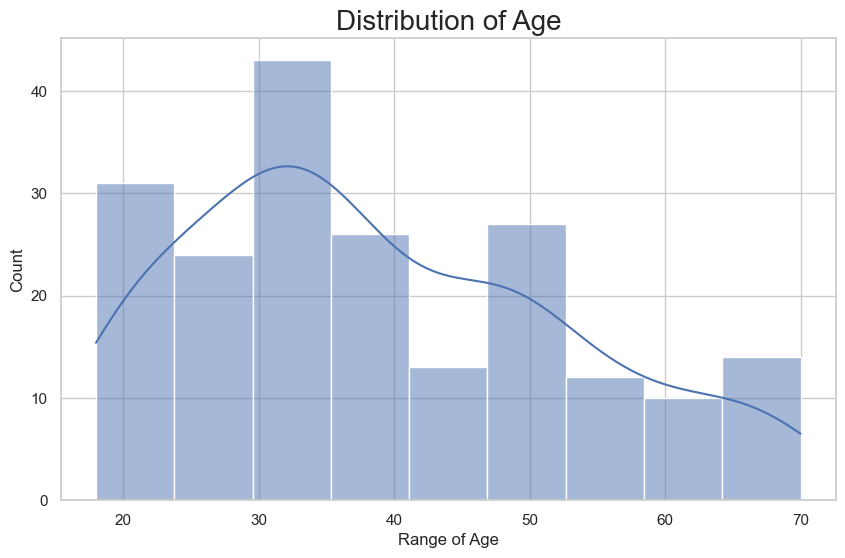

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

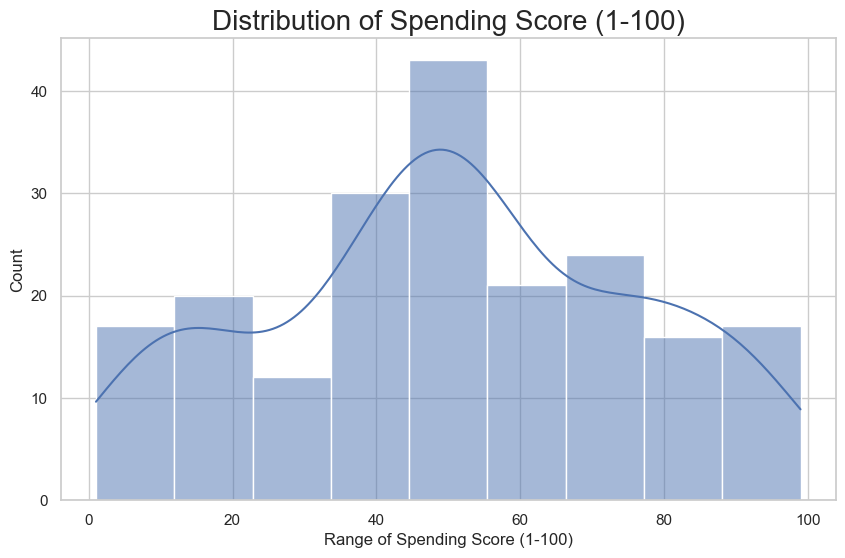

In [16]:
# Distribution of Spending Score using histplot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

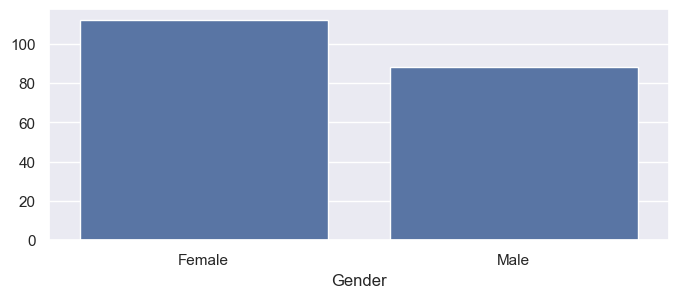

In [17]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [18]:
df1=data[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [19]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


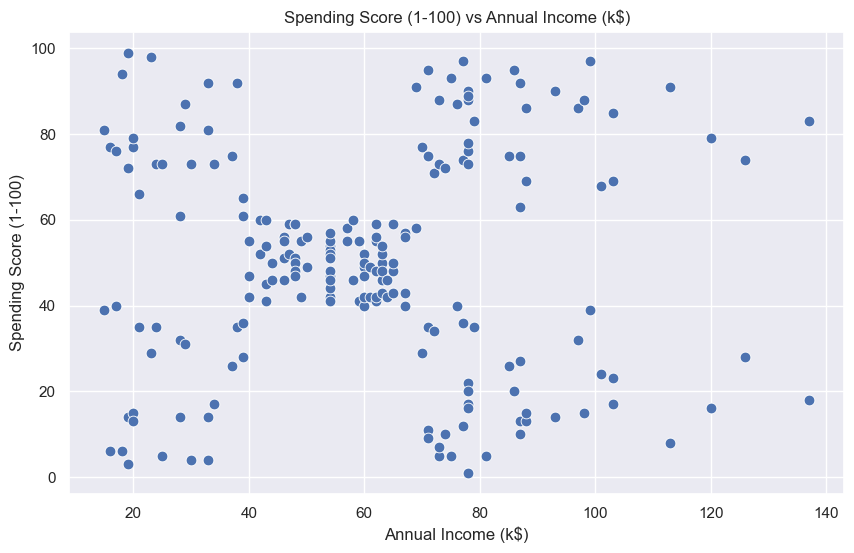

In [20]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [21]:
q1 = data['Spending Score (1-100)'].quantile(0.99)
q2 = data['Annual Income (k$)'].quantile(0.99)
data = data[data['Spending Score (1-100)'] < q1]
data = data[data['Annual Income (k$)'] < q2]
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,196,196.000000,196.000000,196.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,110,NaN,NaN,NaN
mean,NaN,38.969388,60.183673,49.704082
std,NaN,14.082871,25.056386,25.407130
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.000000,42.000000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,72.000000


<Axes: >

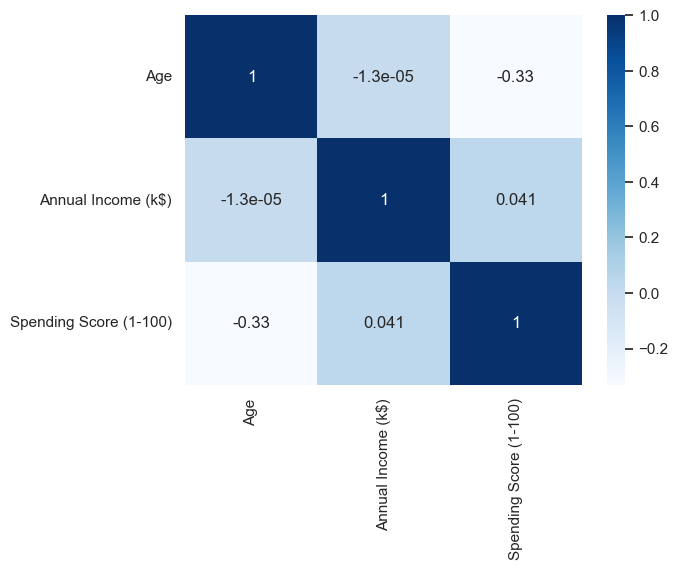

In [22]:
data_num = data.select_dtypes (include=['number'])
corr = data_num.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

# Feature Engineering
### Encoding Categorical Variables

In [23]:
#define category features 
data_cat = data.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Gender' has 2 unique values.


### Encoding Variables with ordinal encoding

In [24]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=data_cat)
data = encoder.fit_transform(data)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
193,2,38,113,91
194,2,47,120,16
195,2,35,120,79
196,2,45,126,28


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
x = data.copy()
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

### Dimensionality Reduction

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(x_scaled)
PCA_ds = pd.DataFrame(pca.transform(x_scaled), columns=(["col1","col2", ]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,196.0,-9.063045e-18,1.164507,-2.049716,-1.016941,0.052891,0.993183,2.859686
col2,196.0,7.250436e-17,1.008572,-2.175809,-0.700532,0.008072,0.770303,2.897154


### Elbow method Analysis

In [27]:
import os
import numpy as np
from sklearn.cluster import KMeans

# Set the environment variable to prevent memory leak issues on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "1"

# Assuming 'X' is your dataset
wcss = []
for i in range(1, 11):
    # Set n_init explicitly to avoid future warning
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

# This will display the Within-Cluster-Sum of Squared Errors (WCSS) for each number of clusters
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30227.60651315203, 25047.41678472346, 21794.885609098194, 19641.456216651564]


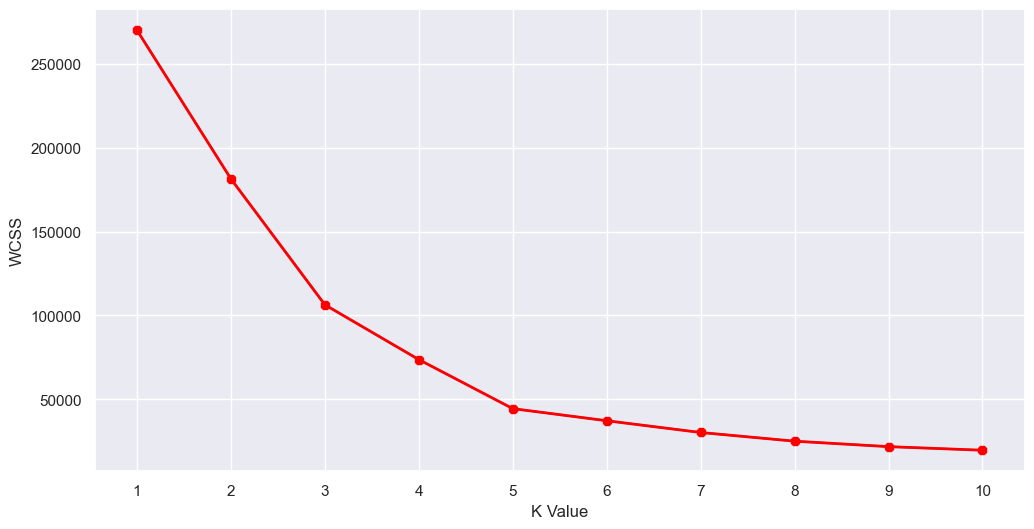

In [28]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [29]:
# Taking 5 clusters and setting n_init to 10 explicitly
km1 = KMeans(n_clusters=5, n_init=10)
# Fitting the input data
km1.fit(X)
# Predicting the labels of the input data
y = km1.predict(X)
# Adding the labels to a column named 'label'
df1["label"] = y
# Display the new dataframe with the clustering done
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


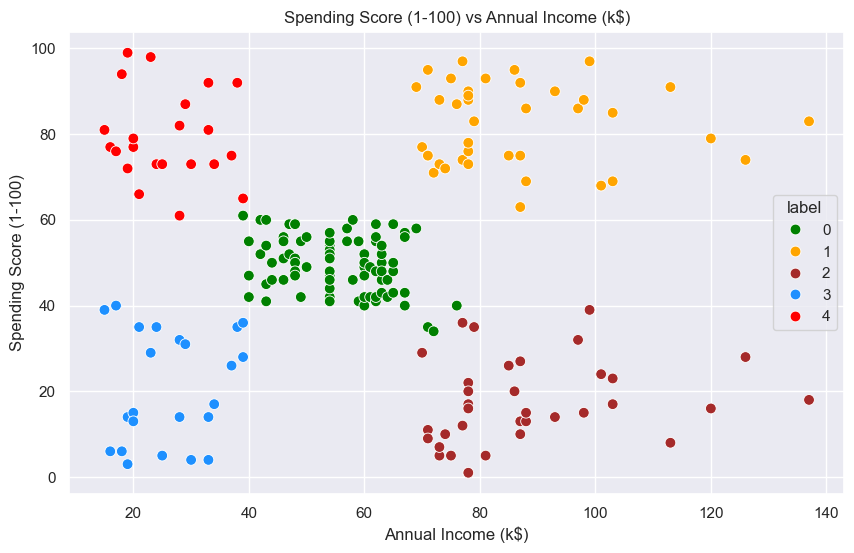

In [30]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [31]:
# Assuming your data has been properly loaded and PCA has been applied
# Making sure that PCA_ds is derived from data and has the same number of rows as data
if len(PCA_ds) == len(data):
    kmeans_new = KMeans(n_clusters=4, n_init=10)
    y_hat = kmeans_new.fit_predict(PCA_ds)
    data["Cluster"] = y_hat
else:
    print(f"Mismatch in row count: PCA_ds has {len(PCA_ds)} rows, data has {len(data)} rows.")

# Display the first few rows to confirm
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        2
2       2   20                  16                       6        1
3       2   23                  16                      77        2
4       2   31                  17                      40        2


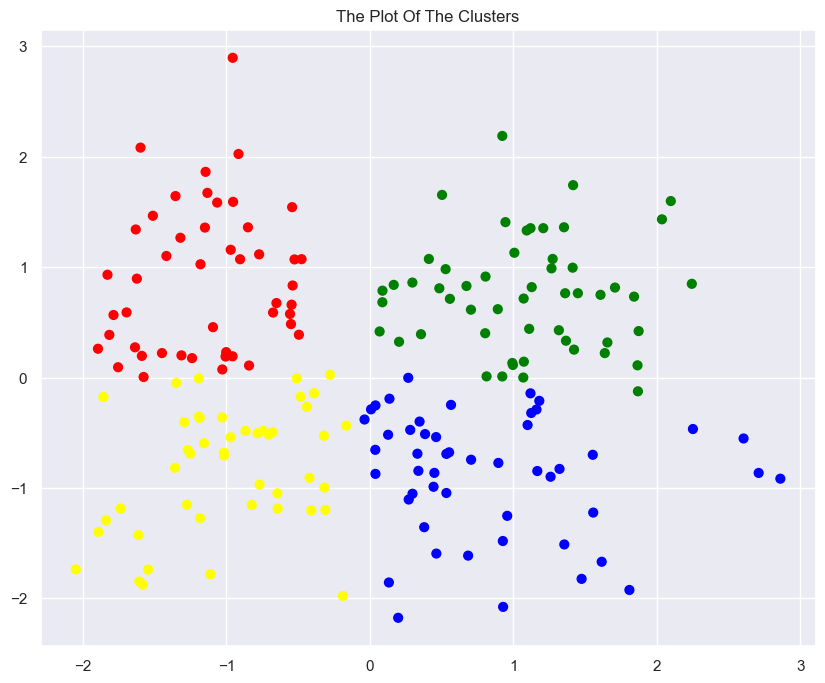

In [32]:
from matplotlib.colors import ListedColormap
kmeans = KMeans(n_clusters=4, n_init=10)
y_clusters = kmeans.fit_predict(PCA_ds[['col1', 'col2']])  # Ensure you're using correct column names for fitting

# Adding the cluster labels to the PCA dataset
PCA_ds['Cluster'] = y_clusters
cmap = ListedColormap(["red", "blue", "green", "yellow"])

# Create the plot
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], s=40, c=PCA_ds['Cluster'], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

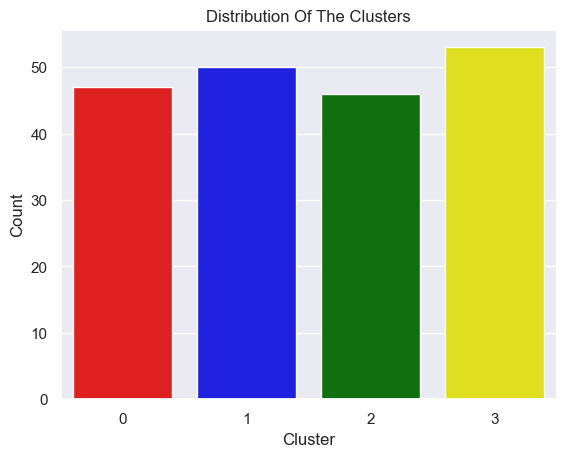

In [33]:
pal = ["red", "blue", "green", "yellow"]

# Updated code as per future Seaborn update
pl = sns.countplot(data=data, x='Cluster', hue='Cluster', palette=pal, legend=False)
pl.set_title("Distribution Of The Clusters")
pl.set_ylabel('Count')  # Optionally, set the y-axis label
plt.show()

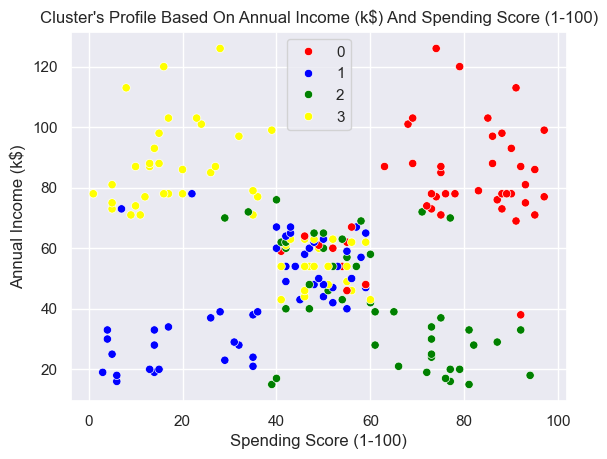

In [34]:
pl = sns.scatterplot(data = data, x=data["Spending Score (1-100)"], y=data["Annual Income (k$)"], hue=data["Cluster"], palette = pal)
pl.set_title("Cluster's Profile Based On Annual Income (k$) And Spending Score (1-100)")
plt.legend()
plt.show()

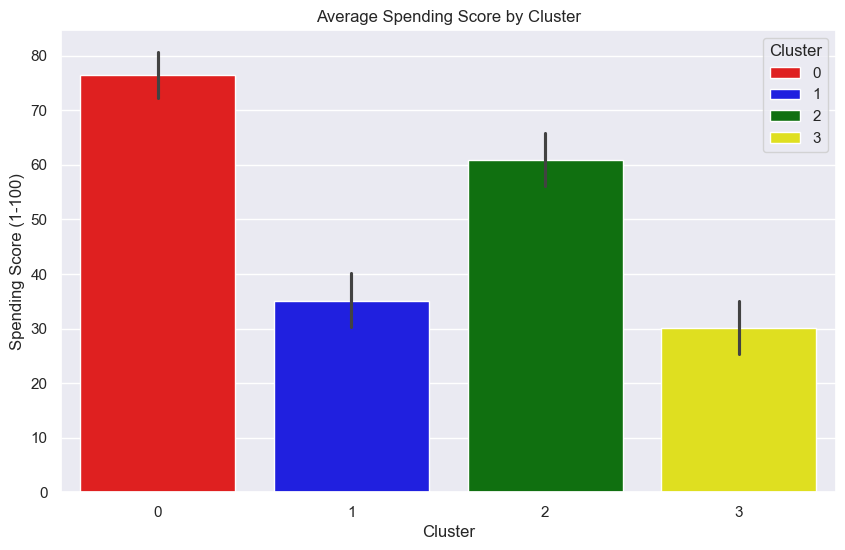

In [35]:
pal = ["red", "blue", "green", "yellow"]

# Correcting the FutureWarning by properly using the 'hue' parameter
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.barplot(data=data, x="Cluster", y="Spending Score (1-100)", hue="Cluster", palette=pal, dodge=False)
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper right')  # Adjust legend, can remove if redundant
plt.show()

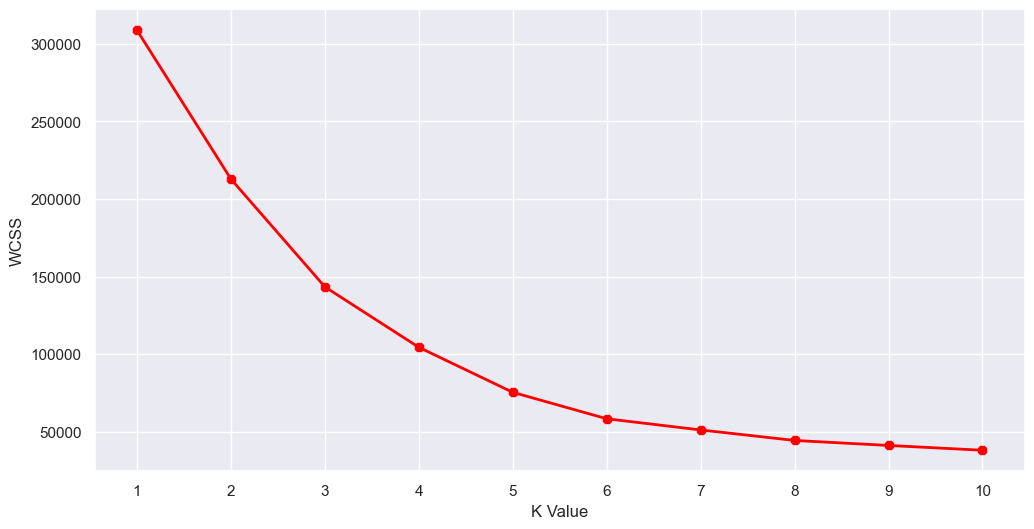

In [36]:
# Taking the features
X2 = df1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

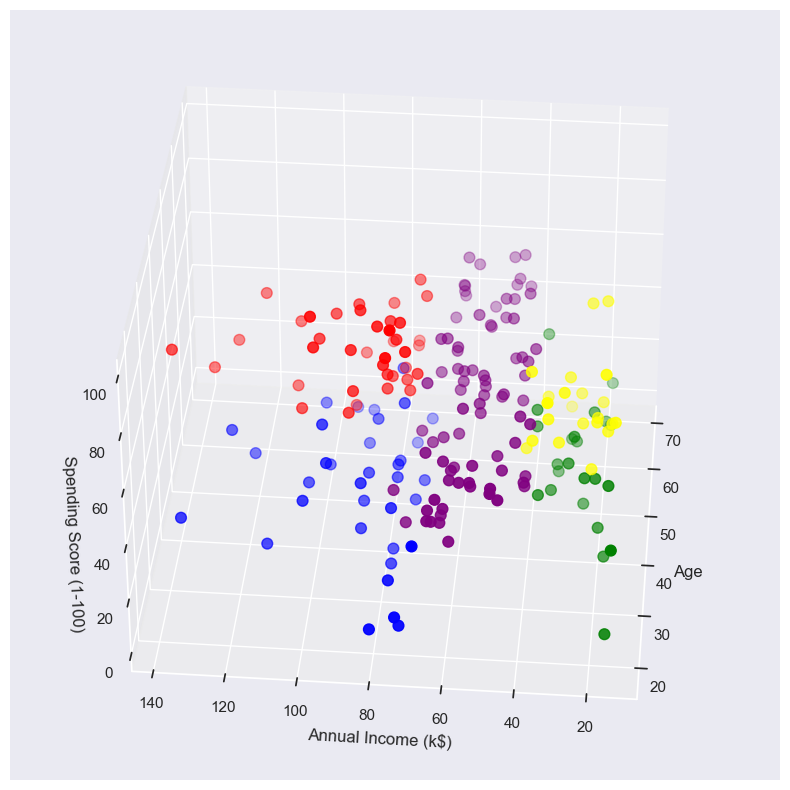

In [37]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Logistic Regression Model Performance

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target vector

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the median of the target variable
y_median = np.median(y)

# Create binary target based on the median
y_class = (y > y_median).astype(int)

# Split data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_class, y_train_class)
predictions_log = model_log.predict(X_test_class)
accuracy_log = accuracy_score(y_test_class, predictions_log)

print(f'Logistic Regression Accuracy: {accuracy_log:.2f}')

Logistic Regression Accuracy: 0.80


# Linear Discriminant Analysis Model Evaluation

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_class, y_train_class)
predictions_lda = model_lda.predict(X_test_class)
accuracy_lda = accuracy_score(y_test_class, predictions_lda)
print(f'LDA Accuracy: {accuracy_lda:.2f}')

LDA Accuracy: 0.82


# Decision Tree Classifier Performance Analysis

In [40]:
from sklearn.tree import DecisionTreeClassifier

# CART
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train_class, y_train_class)
predictions_cart = model_cart.predict(X_test_class)
accuracy_cart = accuracy_score(y_test_class, predictions_cart)
print(f'CART Accuracy: {accuracy_cart:.2f}')

CART Accuracy: 0.97


# Naive Bayes Classifier Accuracy Evaluation

In [41]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_class, y_train_class)
predictions_nb = model_nb.predict(X_test_class)
accuracy_nb = accuracy_score(y_test_class, predictions_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

Naive Bayes Accuracy: 0.95


# K-Nearest Neighbors Classifier Performance Review

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_class, y_train_class)
predictions_knn = model_knn.predict(X_test_class)
accuracy_knn = accuracy_score(y_test_class, predictions_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

KNN Accuracy: 0.95


# Support Vector Machine Classifier Evaluation

In [43]:
from sklearn.svm import SVC

# SVM
model_svm = SVC()
model_svm.fit(X_train_class, y_train_class)
predictions_svm = model_svm.predict(X_test_class)
accuracy_svm = accuracy_score(y_test_class, predictions_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

SVM Accuracy: 0.97


# Random Forest Classifier Performance Analysis

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_class, y_train_class)
predictions_rf = model_rf.predict(X_test_class)
accuracy_rf = accuracy_score(y_test_class, predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.97


# AdaBoost Classifier Accuracy Assessment

In [45]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
model_ab = AdaBoostClassifier()
model_ab.fit(X_train_class, y_train_class)
predictions_ab = model_ab.predict(X_test_class)
accuracy_ab = accuracy_score(y_test_class, predictions_ab)
print(f'AdaBoost Accuracy: {accuracy_ab:.2f}')

AdaBoost Accuracy: 0.97


# ROC Curve Analysis for Logistic Regression Model

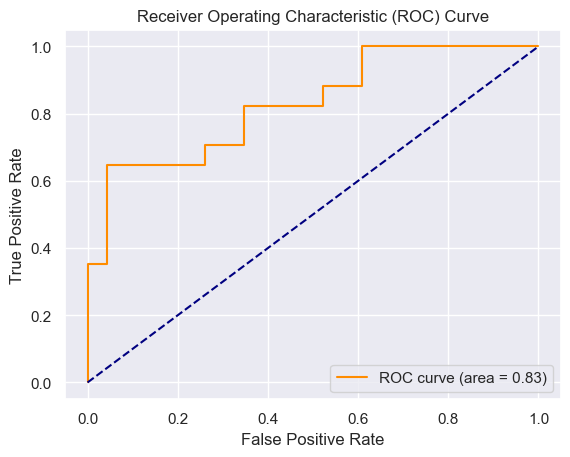

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities instead of predicted classes
probs = model_log.predict_proba(X_test_class)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_class, probs)
auc = roc_auc_score(y_test_class, probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

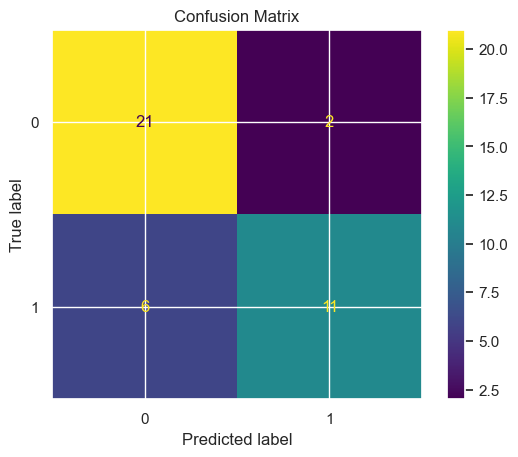

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming model_log and X_test_class, y_test_class are already defined and model trained
predictions_log = model_log.predict(X_test_class)
cm = confusion_matrix(y_test_class, predictions_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()